In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Training datasets
train = pd.read_csv('Train-.csv')
train_beneficiary = pd.read_csv('Train_Beneficiarydata.csv')
train_inpatient = pd.read_csv('Train_Inpatientdata.csv')
train_outpatient = pd.read_csv('Train_Outpatientdata.csv')

In [80]:
train.shape

(5410, 2)

In [106]:
train_beneficiary.shape

(138556, 25)

In [82]:
train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [76]:
train_inpatient.shape

(40474, 30)

In [78]:
train_outpatient.shape

(517737, 27)

In [30]:
# Ensure DOB is a proper datetime format
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'])

# Step 2: Merge datasets while retaining original values
# Merge inpatient claims with beneficiary details
inpatient_merged = train_inpatient.merge(train_beneficiary, on='BeneID', how='left')

# Merge outpatient claims with beneficiary details
outpatient_merged = train_outpatient.merge(train_beneficiary, on='BeneID', how='left')

# Combine inpatient and outpatient datasets into one
merged_claims = pd.concat([inpatient_merged, outpatient_merged], ignore_index=True)

# Step 3: Merge with the train dataset (fraud labels)
train_full_data = train.merge(merged_claims, on='Provider', how='left')

# Step 4: Check the final dataset
print(train_full_data.head())



   Provider PotentialFraud      BeneID   ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No   BENE36012  CLM58316   2009-07-04  2009-07-08   
1  PRV51001             No   BENE38773  CLM52334   2009-05-23  2009-05-25   
2  PRV51001             No   BENE98831  CLM36844   2009-02-03  2009-02-08   
3  PRV51001             No  BENE102690  CLM49733   2009-05-04  2009-05-18   
4  PRV51001             No  BENE152088  CLM37205   2009-02-06  2009-02-06   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   36000          PHY340163                NaN   
1                   12000          PHY346762                NaN   
2                    3000          PHY383193                NaN   
3                   42000          PHY383193          PHY378091   
4                    4000          PHY402229          PHY329739   

  OtherPhysician  ... ChronicCond_Depression ChronicCond_Diabetes  \
0            NaN  ...                      1                    1

In [32]:
train_full_data.shape

(558211, 55)

In [34]:
# Set options to show all rows
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.min_rows', None)  # Avoid summarization
print(train_full_data[:50])  # Display the first 50 rows


    Provider PotentialFraud      BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0   PRV51001             No   BENE36012   CLM58316   2009-07-04  2009-07-08   
1   PRV51001             No   BENE38773   CLM52334   2009-05-23  2009-05-25   
2   PRV51001             No   BENE98831   CLM36844   2009-02-03  2009-02-08   
3   PRV51001             No  BENE102690   CLM49733   2009-05-04  2009-05-18   
4   PRV51001             No  BENE152088   CLM37205   2009-02-06  2009-02-06   
5   PRV51001             No   BENE11727  CLM733300   2009-12-17  2009-12-17   
6   PRV51001             No   BENE24646  CLM372475   2009-05-22  2009-05-23   
7   PRV51001             No   BENE31617  CLM748221   2009-12-28  2009-12-28   
8   PRV51001             No   BENE32715  CLM272936   2009-03-29  2009-03-30   
9   PRV51001             No   BENE49220  CLM452024   2009-07-04  2009-07-04   
10  PRV51001             No   BENE56354  CLM403535   2009-06-08  2009-06-08   
11  PRV51001             No   BENE57060  CLM578620  

In [38]:
train_full_data

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Shape of the dataset
print(f"Shape of the dataset: {train_full_data.shape}")

# Step 2: Summary statistics for numerical features
print("\nSummary statistics for numerical columns:")
print(train_full_data.describe())

# Step 3: Check for missing values
print("\nMissing values:")
print(train_full_data.isnull().sum())

# Step 4: Check data types of columns
print("\nData types of columns:")
print(train_full_data.dtypes)

# Step 5: Check unique values for categorical features
print("\nUnique values in categorical columns:")
categorical_columns = train_full_data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {train_full_data[col].nunique()} unique values")


Shape of the dataset: (558211, 55)

Summary statistics for numerical columns:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count           558211.000000      557312.000000        23310.000000   
mean               997.012133          78.421085         5896.154612   
min                  0.000000           0.000000           11.000000   
25%                 40.000000           0.000000         3848.000000   
50%                 80.000000           0.000000         5363.000000   
75%                300.000000           0.000000         8669.000000   
max             125000.000000        1068.000000         9999.000000   
std               3821.534891         274.016812         3050.489933   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count         5490.000000          969.000000          118.000000   
mean          4106.358106         4221.123839         4070.262712   
min             42.000000           42.000000           42.000000 

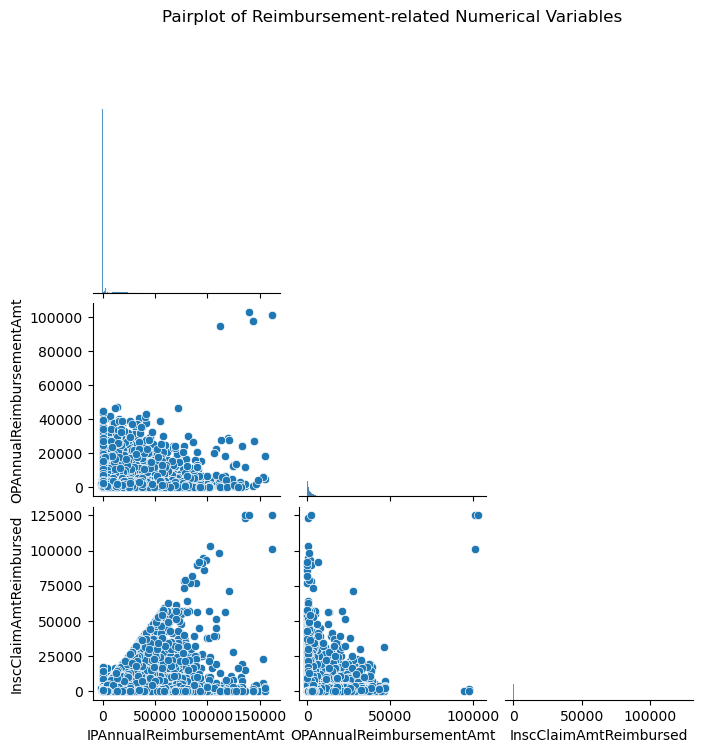

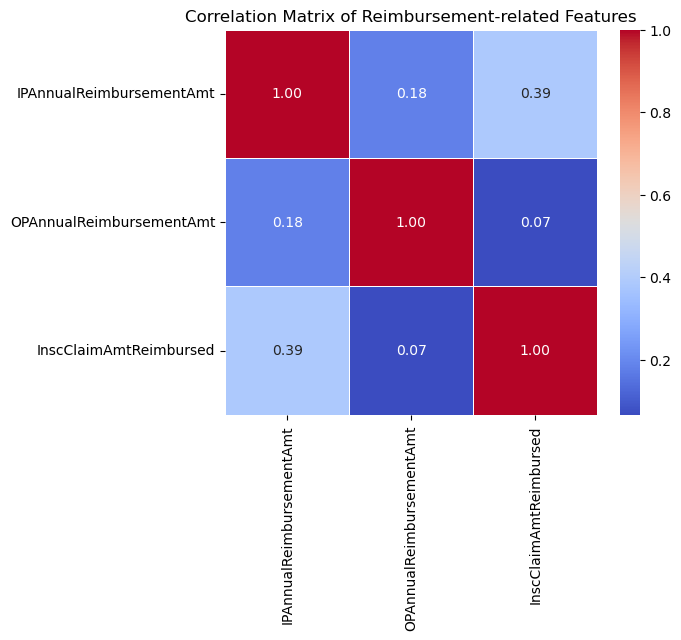

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


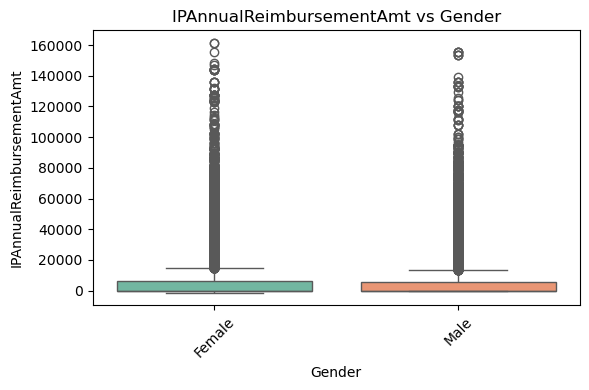

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


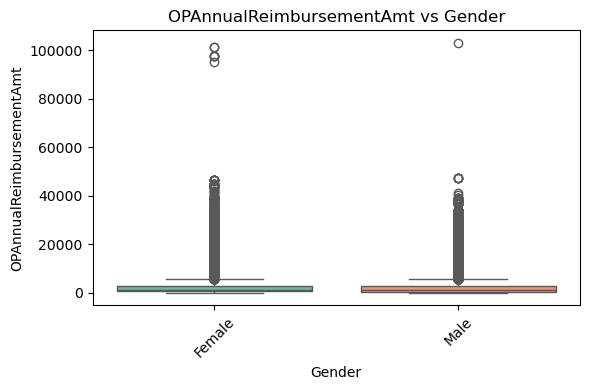

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


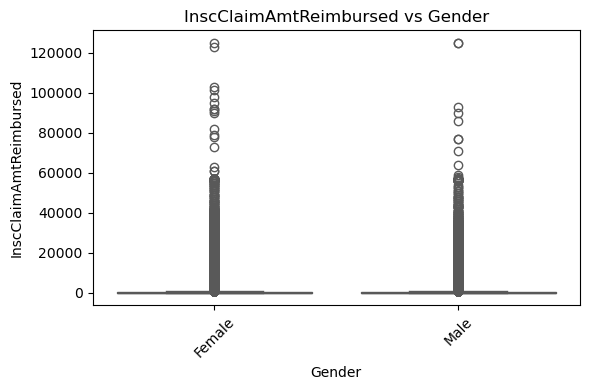

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


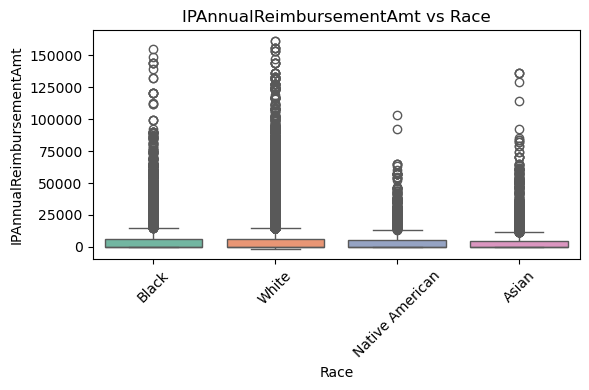

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


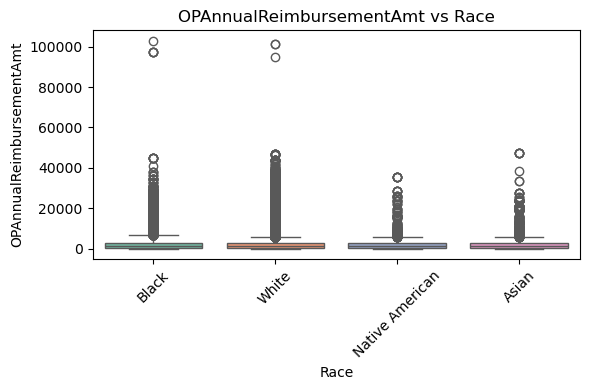

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


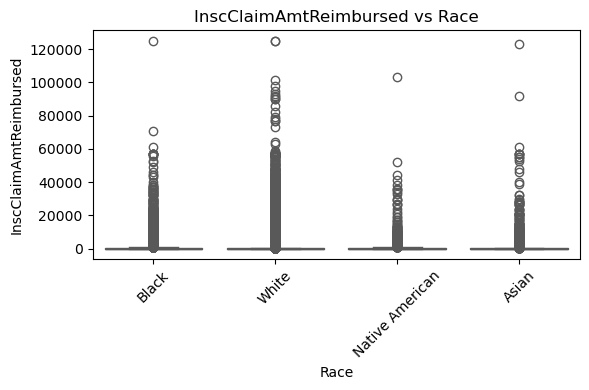

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


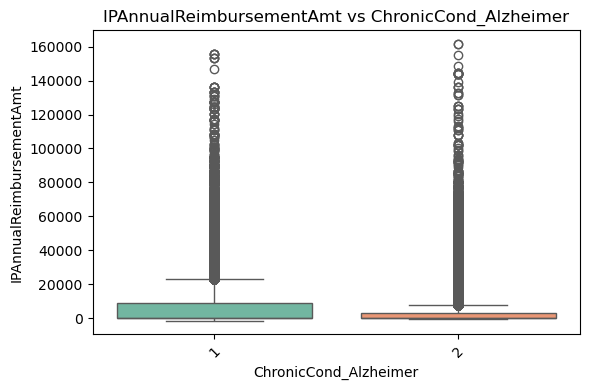

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


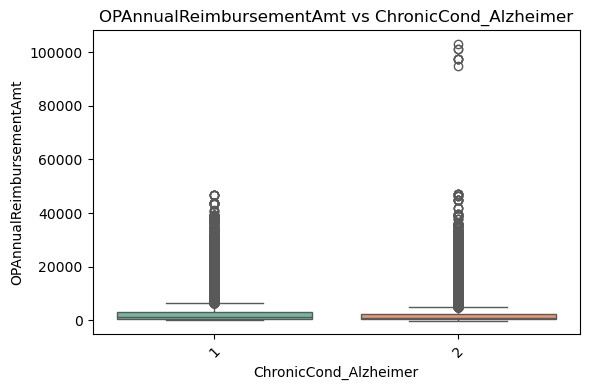

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


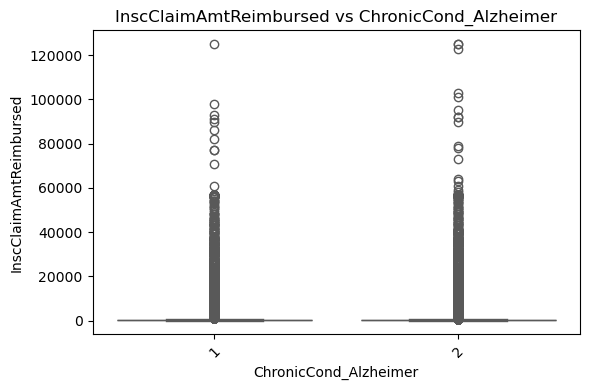

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


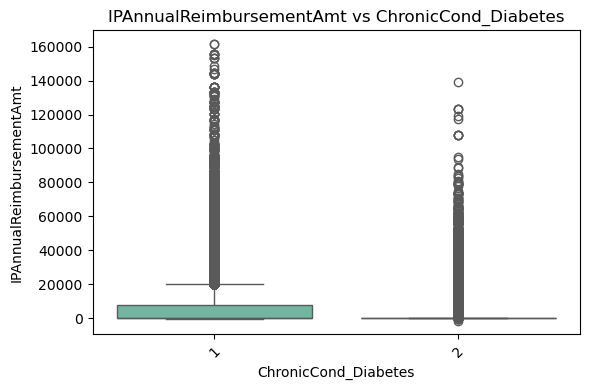

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


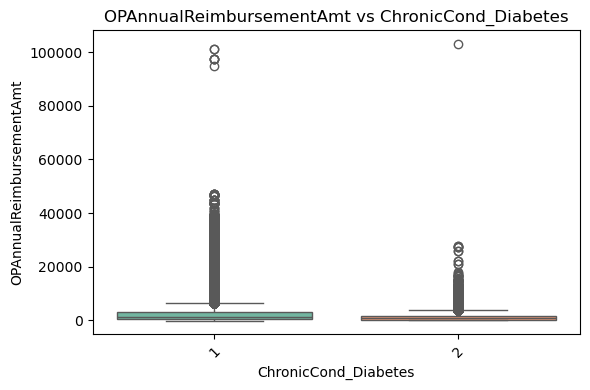

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


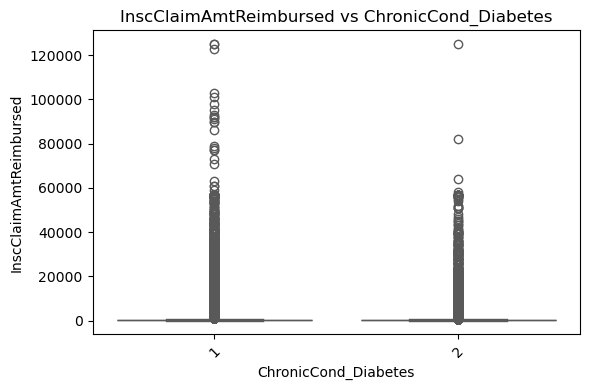

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


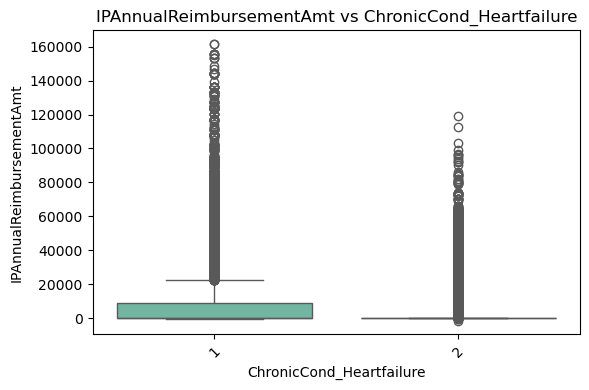

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


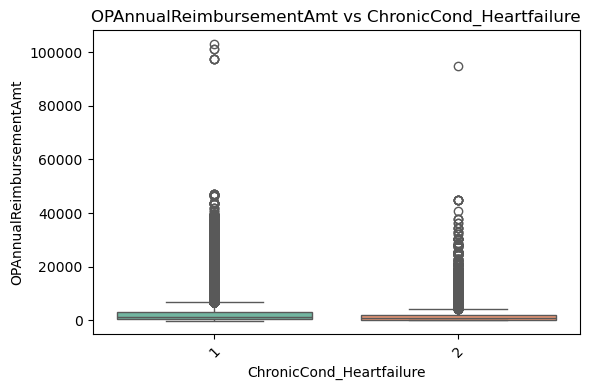

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\396874758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')


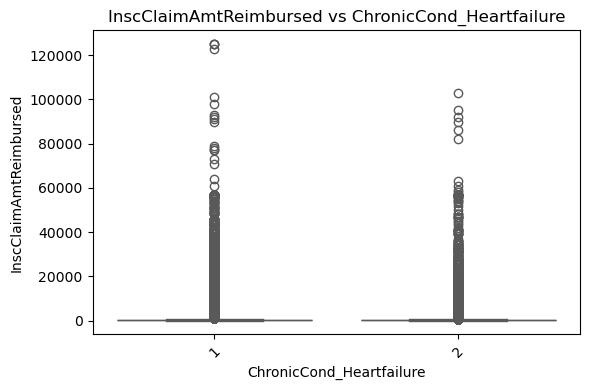

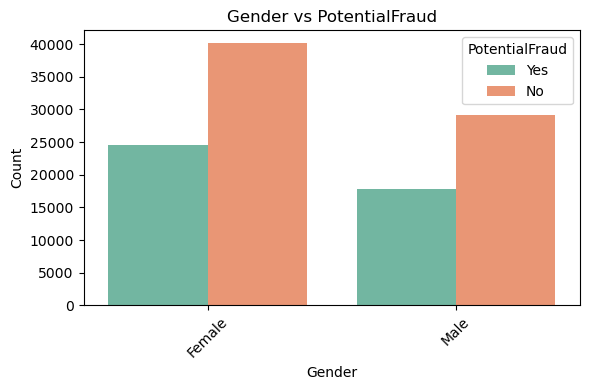

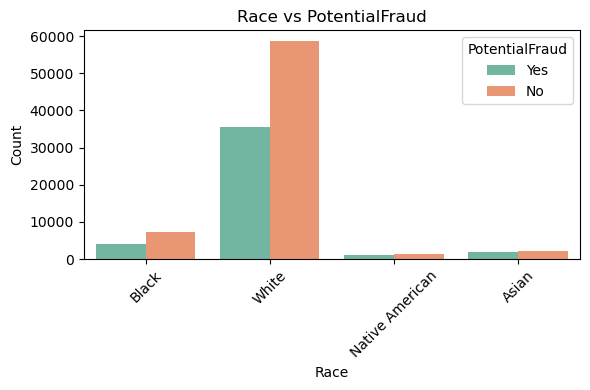

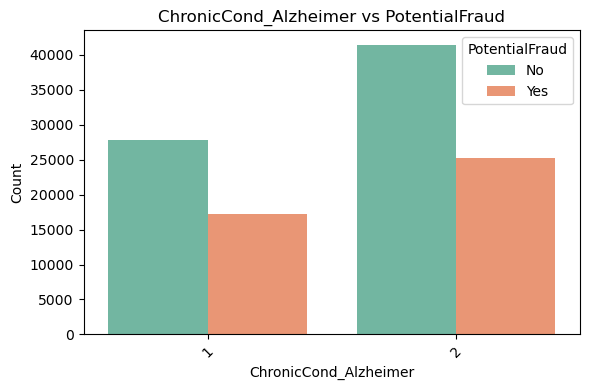

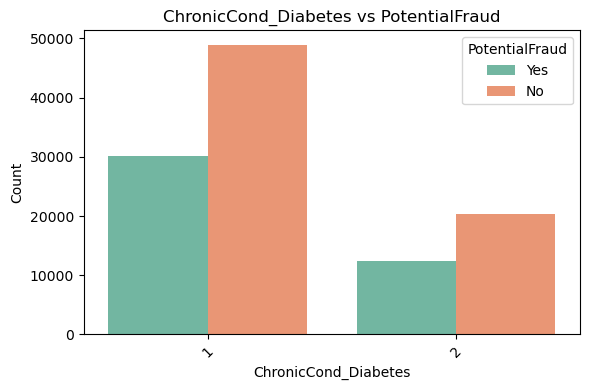

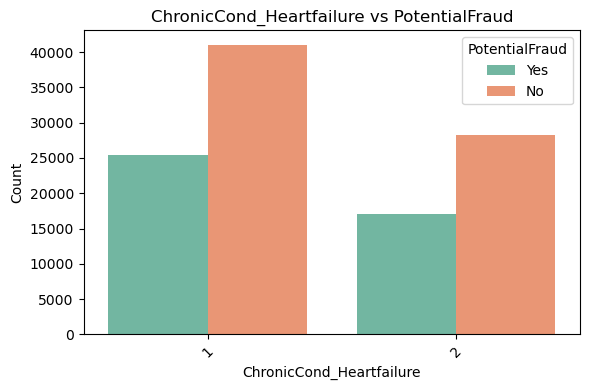

In [64]:
# Sample a smaller portion of the data for visualization
sample_size = 0.2  # 10% of the data, adjust as needed
sampled_data = train_full_data.sample(frac=sample_size, random_state=42)

# 1. Numerical vs. Numerical (Pairplot)
sns.pairplot(sampled_data[important_numerical_columns], corner=True)
plt.suptitle("Pairplot of Reimbursement-related Numerical Variables", y=1.02)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

# Correlation matrix of numerical features
plt.figure(figsize=(6, 5))
corr_matrix = sampled_data[important_numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Reimbursement-related Features")
plt.show()

# 2. Numerical vs. Categorical (Boxplots)
for cat_col in important_categorical_columns:
    for num_col in important_numerical_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=sampled_data[cat_col], y=sampled_data[num_col], palette='Set2')
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
# 3. Categorical vs. Categorical (Countplots)
for cat_col in important_categorical_columns:
    if cat_col != 'PotentialFraud':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=sampled_data[cat_col], hue=sampled_data['PotentialFraud'], palette='Set2')
        plt.title(f'{cat_col} vs PotentialFraud')
        plt.xlabel(cat_col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\2478687095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RenalDiseaseIndicator', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\2478687095.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\2478687095.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='

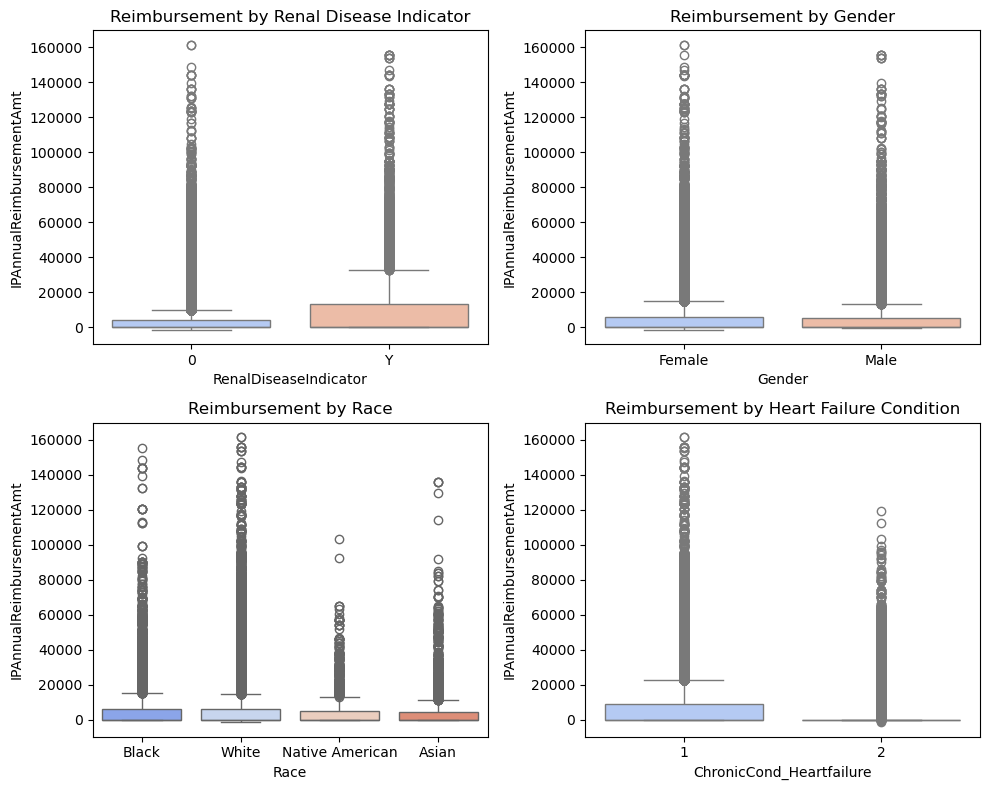

In [68]:
# Subset the data with selected key categorical and numerical columns for cleaner plots
filtered_data = sampled_data[['RenalDiseaseIndicator', 'Gender', 'Race', 'ChronicCond_Heartfailure', 'IPAnnualReimbursementAmt']]

# Set the figure size for all plots
plt.figure(figsize=(10, 8))

# Plot Boxplots
plt.subplot(2, 2, 1)
sns.boxplot(x='RenalDiseaseIndicator', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
plt.title('Reimbursement by Renal Disease Indicator')

plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
plt.title('Reimbursement by Gender')

plt.subplot(2, 2, 3)
sns.boxplot(x='Race', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
plt.title('Reimbursement by Race')

plt.subplot(2, 2, 4)
sns.boxplot(x='ChronicCond_Heartfailure', y='IPAnnualReimbursementAmt', data=filtered_data, palette='coolwarm')
plt.title('Reimbursement by Heart Failure Condition')

plt.tight_layout()
plt.show()



In [70]:
# Check for missing values
missing_values = train_full_data.isnull().sum()
missing_percent = (missing_values / len(train_full_data)) * 100
print(f"Missing Values (%): \n{missing_percent}")

# Check for duplicate rows
duplicates = train_full_data.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")


Missing Values (%): 
Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisC

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_28636\2428055441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PotentialFraud', data=train_full_data, palette='coolwarm')


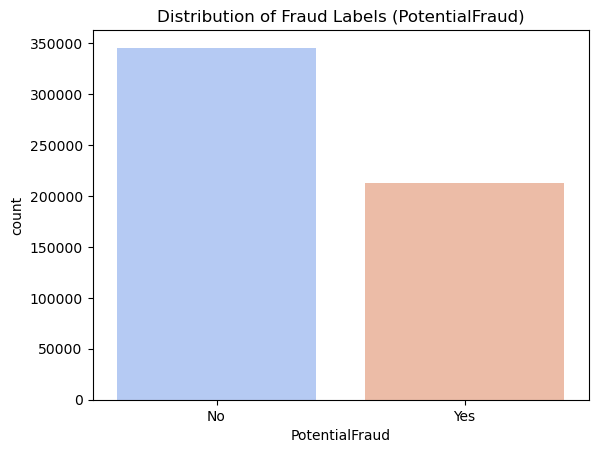

In [72]:
# Target variable distribution
sns.countplot(x='PotentialFraud', data=train_full_data, palette='coolwarm')
plt.title('Distribution of Fraud Labels (PotentialFraud)')
plt.show()


In [74]:
# Save the merged train dataset as a CSV file
train_full_data.to_csv('merged_train_dataset.csv', index=False)